In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat

In [2]:
df=pd.read_csv('D:/ICT kerala/week9/Sales_data_zone_wise.csv')

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [6]:
df.shape

(29, 5)

In [7]:
df.size

145

In [8]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

# 1. Mean sales of each zone

In [9]:
mean_sale=pd.Series(df.mean().tolist())
zone=pd.Series(['zone-A','zone-b','zone-C','zone-D'])
meanSale_df=pd.DataFrame({'zone':zone,'mean_sale':mean_sale})
meanSale_df

,zone,mean_sale
0,zone-A,1.540493e+06
1,zone-b,1.755560e+06
2,zone-C,1.772871e+06
3,zone-D,1.842927e+06


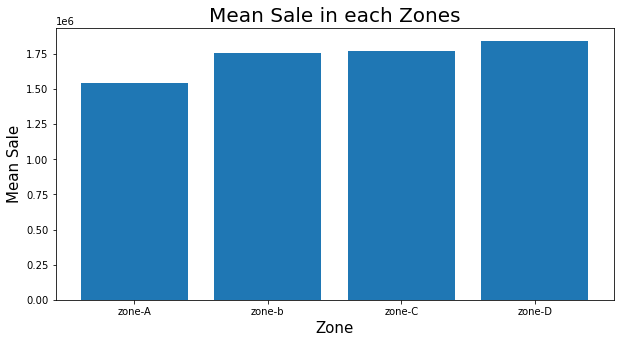

In [10]:
plt.figure(figsize=(10,5))
plt.title('Mean Sale in each Zones',fontsize=20)
plt.xlabel('Zone',fontsize=15)
plt.ylabel('Mean Sale',fontsize=15)
plt.bar(meanSale_df['zone'],meanSale_df['mean_sale'])
plt.show()

# 2. Total sales in each month

In [11]:
total_sale_monthwise=df.sum(axis=1)

In [12]:
totalSale_df=pd.DataFrame({'month':df['Month'],'total_sale':total_sale_monthwise})
totalSale_df

,month,total_sale
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


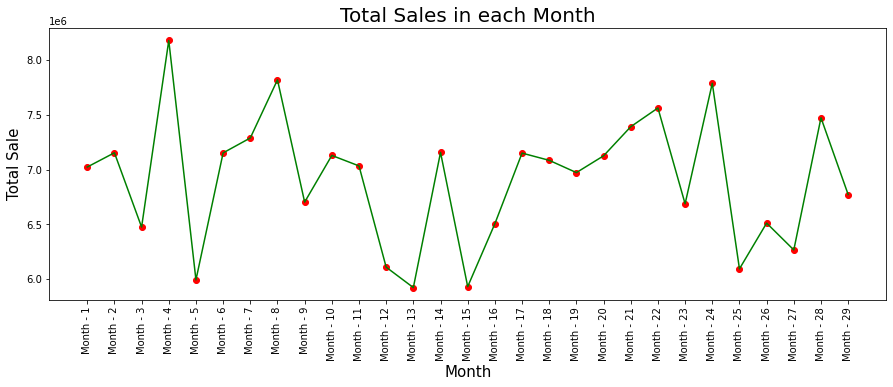

In [13]:
plt.figure(figsize=(15,5))
plt.title('Total Sales in each Month',fontsize=20)
plt.plot(totalSale_df['month'],totalSale_df['total_sale'],c='g')
plt.scatter(totalSale_df['month'],totalSale_df['total_sale'],c='r')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Sale',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# 3. Check whether all the zones generate the same amount of sales

Here we are using the one way ANOVA

H0: All the zones generate same amount of sales

H1: The amount of sales is different for atleast one zone

sig.level= 0.05

In [14]:
test_stat,p_value=stat.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('Test statistic value = ',test_stat)
print('The p value = ',p_value)
if p_value<0.05:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')

Test statistic value =  5.672056106843581
The p value =  0.0011827601694503335
We reject the null hypothesis


The sales generated by all the zones are not the same